<a href="https://colab.research.google.com/github/OnasanyaDemilade/OnasanyaDemilade/blob/main/Malaria_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data and Modules Import

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("/content/Subnational Unit-data.csv")

In [27]:
df.head()

,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value
0,NGA,Nigeria,Edo,admin1,Incidence Rate,Cases per Thousand,2010,377.970784
1,NGA,Nigeria,Edo,admin1,Incidence Rate,Cases per Thousand,2011,351.592662
2,NGA,Nigeria,Edo,admin1,Incidence Rate,Cases per Thousand,2012,324.145281
3,NGA,Nigeria,Edo,admin1,Incidence Rate,Cases per Thousand,2013,297.068129
4,NGA,Nigeria,Edo,admin1,Incidence Rate,Cases per Thousand,2014,273.957934


### Data Cleaning and Processing

In [28]:
df.drop(['ISO3', 'National Unit', 'Admin Level'], axis=1, inplace=True)

In [29]:
df.rename({'Name': "State"}, axis=1, inplace=True)

In [30]:
def name_fct (df):
    if df in ["Abuja"]:
        new_df = "Federal Capital Territory"
        return new_df
    else:
        return df

df['State'] = df['State'].apply(name_fct)

In [31]:
df['State'].unique()

array(['Edo', 'Kano', 'Bayelsa', 'Zamfara', 'Ebonyi', 'Ogun',
       'Federal Capital Territory', 'Abia', 'Osun', 'Anambra', 'Delta',
       'Oyo', 'Plateau', 'Akwa Ibom', 'Lagos', 'Gombe', 'Kwara', 'Ekiti',
       'Yobe', 'Kebbi', 'Cross River', 'Nassarawa', 'Katsina', 'Benue',
       'Kaduna', 'Kogi', 'Imo', 'Sokoto', 'Enugu', 'Niger', 'Bauchi',
       'Jigawa', 'Rivers', 'Taraba', 'Ondo', 'Adamawa', 'Borno'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   1443 non-null   object 
 1   Metric  1443 non-null   object 
 2   Units   1443 non-null   object 
 3   Year    1443 non-null   int64  
 4   Value   1443 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 56.5+ KB


In [33]:
#### There are no null values so we proceed in masking

df = df[df['Metric'] == 'Incidence Rate']

In [34]:
import pandas as pd
import geopandas as gpd

geojson = gpd.read_file("/content/Nigeria_Poly (1).geojson")

In [35]:
geojson

,Name,timestamp,id,country,locname,boundary,adminlevel,wikidata,wikimedia,path,rpath,iso3166_2,geometry
0,Abia,2019-11-05 22:59:03,3713501,NGA,Abia,administrative,4,Q320852,en:Abia State,0,192787,3713501,"POLYGON ((7.14043 4.90063, 7.14375 4.89561, 7...."
1,Adamawa,2019-12-11 22:37:02,3720358,NGA,Adamawa,administrative,4,Q337514,en:Adamawa State,0,192787,3720358,"POLYGON ((11.34152 8.01867, 11.34614 8.01523, ..."
2,Akwa Ibom,2019-11-02 23:01:02,3715359,NGA,Akwa Ibom,administrative,4,Q424388,en:Akwa Ibom State,0,192787,3715359,"MULTIPOLYGON (((8.34338 4.60775, 8.34325 4.607..."
3,Anambra,2019-11-03 23:02:02,3715505,NGA,Anambra,administrative,4,Q117714,en:Anambra State,0,192787,3715505,"POLYGON ((6.63362 5.73004, 6.65089 5.72511, 6...."
4,Bauchi,2019-11-02 23:01:02,3722233,NGA,Bauchi,administrative,4,Q503936,en:Bauchi State,0,192787,3722233,"POLYGON ((8.74922 10.4407, 8.75362 10.43965, 8..."
5,Bayelsa,2019-11-03 23:02:02,3715844,NGA,Bayelsa,administrative,4,Q532153,en:Bayelsa State,0,192787,3715844,"MULTIPOLYGON (((5.44317 4.96434, 5.44257 4.964..."
6,Benue,2019-11-15 22:59:02,3716076,NGA,Benue,administrative,4,Q429908,en:Benue State,0,192787,3716076,"POLYGON ((7.53051 7.03228, 7.53827 7.02016, 7...."
7,Borno,2019-12-28 22:57:02,3721167,NGA,Borno,administrative,4,Q130626,en:Borno State,0,192787,3721167,"POLYGON ((11.52934 10.31362, 11.52981 10.31403..."
8,Cross River,2019-12-03 22:59:01,3716250,NGA,Cross River,administrative,4,Q739676,en:Cross River State,0,192787,3716250,"MULTIPOLYGON (((8.14156 4.95736, 8.14143 4.957..."
9,Delta,2019-10-31 23:10:02,3716950,NGA,Delta,administrative,4,Q503910,en:Delta State,0,192787,3716950,"MULTIPOLYGON (((5.37315 5.58541, 5.36773 5.584..."


In [36]:
geojson.rename(columns={'Name': 'State'}, inplace=True)


In [37]:
df2 = pd.merge(df, geojson, on='State')

<Axes: >

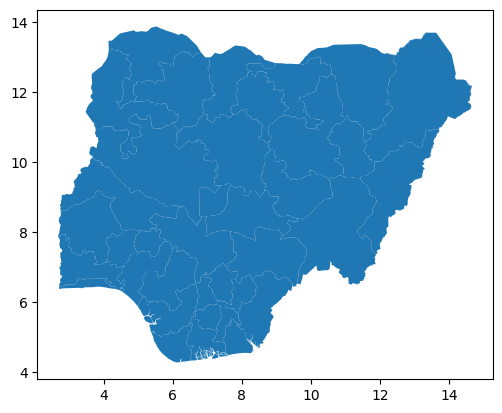

In [38]:
geojson.plot()

In [39]:
# Pivot the DataFrame
pivot_df = df.pivot(index='State', columns='Year', values='Value')

# Reset the index to make 'State' a regular column
pivot_df = pivot_df.reset_index()

# Display the pivoted DataFrame
pivot_df


Year,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Abia,342.333389,293.261851,277.460453,262.637080,229.299123,179.475791,148.093929,162.909241,221.179970,276.495462,293.979170,242.794050,285.852981
1,Adamawa,249.748064,217.216343,218.285805,237.067168,267.382855,307.953810,330.313840,314.631521,258.778848,215.741740,227.677053,267.181692,310.325729
2,Akwa Ibom,282.239256,241.390314,234.975844,236.087122,223.116457,194.891088,176.587078,196.267386,251.933684,298.483740,312.979095,265.042295,285.720418
3,Anambra,238.937720,207.272208,204.657988,206.969955,189.285255,151.921062,123.347282,128.632698,166.349980,209.029518,238.071188,224.103856,231.296888
4,Bauchi,513.277604,459.625032,384.099566,316.781361,291.124058,289.792888,297.799188,321.816971,361.023974,384.908192,420.992792,413.165933,367.363332
5,Bayelsa,251.820417,249.850264,275.675179,297.533079,292.771820,257.229632,219.082738,211.782229,226.224313,244.591783,261.775739,252.469971,244.532376
6,Benue,467.030405,425.101850,377.184258,335.765225,307.019696,287.395738,270.779962,259.603933,245.588171,238.406924,262.904786,293.692413,310.483661
7,Borno,311.818100,284.566643,252.147502,228.477449,230.999677,252.478979,273.964247,281.984415,270.788096,257.504832,282.359213,305.952145,311.409083
8,Cross River,368.162110,331.817974,311.930984,297.273352,281.672352,263.029737,246.327954,247.009934,259.113783,269.423445,283.544716,272.202070,286.201974
9,Delta,199.366535,183.932930,192.775678,207.733115,211.407308,204.765959,199.546054,214.776970,243.709778,264.215456,268.779591,231.545041,200.986598


In [40]:
# Reset the index to make 'State' a regular column
pivot_df = pivot_df.reset_index()

# Merge the pivoted DataFrame with the GeoDataFrame
merged_gdf = geojson.merge(pivot_df, on='State', how='left')

# Display the merged GeoDataFrame
merged_gdf


,State,timestamp,id,country,locname,boundary,adminlevel,wikidata,wikimedia,path,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Abia,2019-11-05 22:59:03,3713501,NGA,Abia,administrative,4,Q320852,en:Abia State,0,...,262.637080,229.299123,179.475791,148.093929,162.909241,221.179970,276.495462,293.979170,242.794050,285.852981
1,Adamawa,2019-12-11 22:37:02,3720358,NGA,Adamawa,administrative,4,Q337514,en:Adamawa State,0,...,237.067168,267.382855,307.953810,330.313840,314.631521,258.778848,215.741740,227.677053,267.181692,310.325729
2,Akwa Ibom,2019-11-02 23:01:02,3715359,NGA,Akwa Ibom,administrative,4,Q424388,en:Akwa Ibom State,0,...,236.087122,223.116457,194.891088,176.587078,196.267386,251.933684,298.483740,312.979095,265.042295,285.720418
3,Anambra,2019-11-03 23:02:02,3715505,NGA,Anambra,administrative,4,Q117714,en:Anambra State,0,...,206.969955,189.285255,151.921062,123.347282,128.632698,166.349980,209.029518,238.071188,224.103856,231.296888
4,Bauchi,2019-11-02 23:01:02,3722233,NGA,Bauchi,administrative,4,Q503936,en:Bauchi State,0,...,316.781361,291.124058,289.792888,297.799188,321.816971,361.023974,384.908192,420.992792,413.165933,367.363332
5,Bayelsa,2019-11-03 23:02:02,3715844,NGA,Bayelsa,administrative,4,Q532153,en:Bayelsa State,0,...,297.533079,292.771820,257.229632,219.082738,211.782229,226.224313,244.591783,261.775739,252.469971,244.532376
6,Benue,2019-11-15 22:59:02,3716076,NGA,Benue,administrative,4,Q429908,en:Benue State,0,...,335.765225,307.019696,287.395738,270.779962,259.603933,245.588171,238.406924,262.904786,293.692413,310.483661
7,Borno,2019-12-28 22:57:02,3721167,NGA,Borno,administrative,4,Q130626,en:Borno State,0,...,228.477449,230.999677,252.478979,273.964247,281.984415,270.788096,257.504832,282.359213,305.952145,311.409083
8,Cross River,2019-12-03 22:59:01,3716250,NGA,Cross River,administrative,4,Q739676,en:Cross River State,0,...,297.273352,281.672352,263.029737,246.327954,247.009934,259.113783,269.423445,283.544716,272.202070,286.201974
9,Delta,2019-10-31 23:10:02,3716950,NGA,Delta,administrative,4,Q503910,en:Delta State,0,...,207.733115,211.407308,204.765959,199.546054,214.776970,243.709778,264.215456,268.779591,231.545041,200.986598


In [41]:
merged_gdf.columns

Index([     'State',  'timestamp',         'id',    'country',    'locname',
         'boundary', 'adminlevel',   'wikidata',  'wikimedia',       'path',
            'rpath',  'iso3166_2',   'geometry',      'index',         2010,
               2011,         2012,         2013,         2014,         2015,
               2016,         2017,         2018,         2019,         2020,
               2021,         2022],
      dtype='object')

### Exploratory Data Analysis

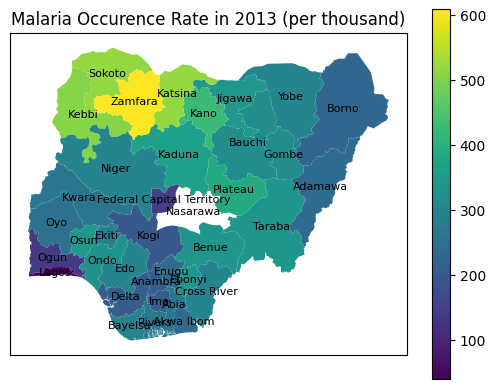

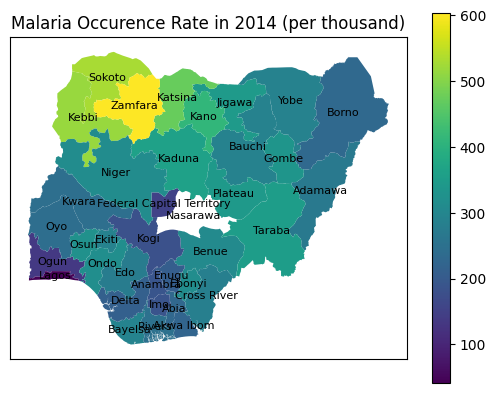

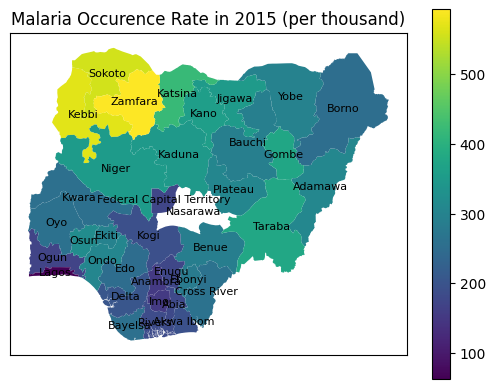

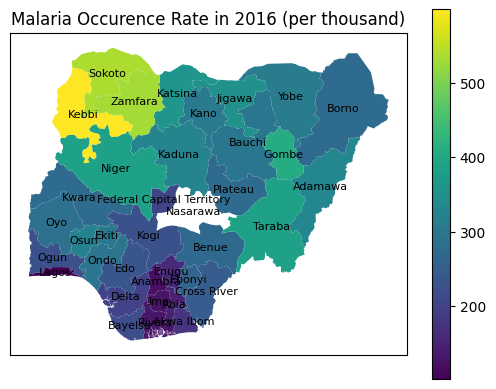

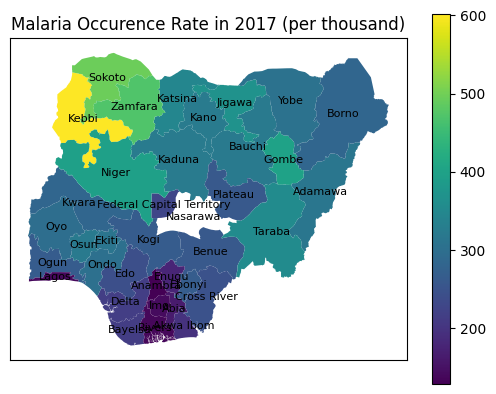

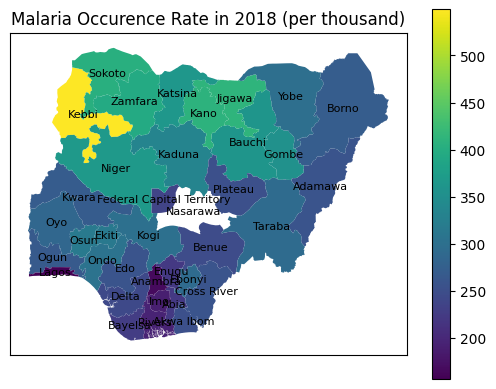

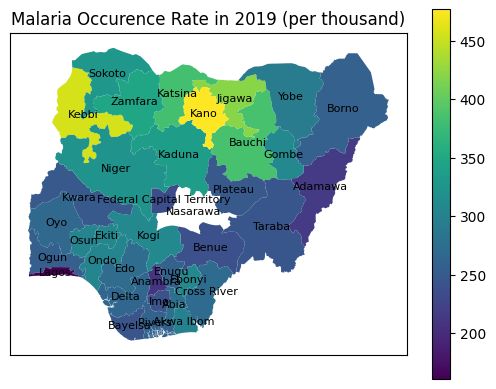

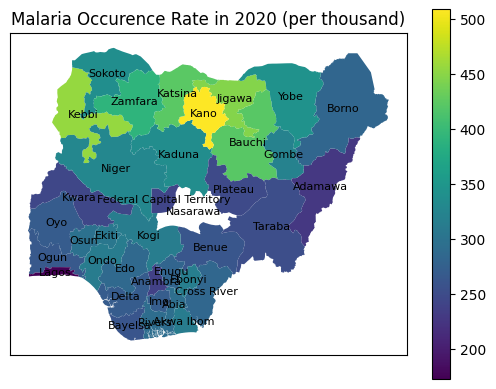

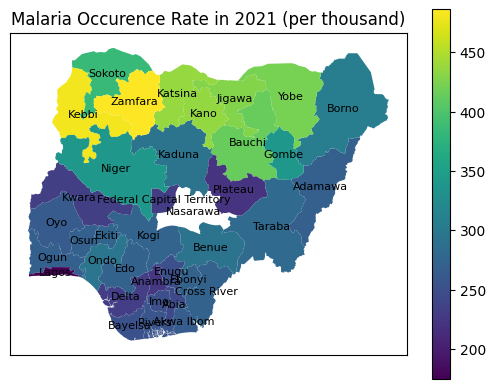

In [83]:
for i in range(2013, 2022):
  merged_gdf.plot(column=i, legend=True)

  plt.title(f"Malaria Occurence Rate in {i} (per thousand)")

  for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['State']):
    plt.text(x, y, label, fontsize=8, ha='center', va='center')

  plt.tick_params(
      axis='both',          # changes apply to both axes
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False, # labels along the bottom edge are off
      left=False,        # ticks along the left edge are off
      right=False,       # ticks along the right edge are off
      labelleft=False    # labels along the left edge are off
  )
  plt.savefig(f"before_{i}.png", dpi=300)
  plt.show()

In [43]:
df.head()

,State,Metric,Units,Year,Value
0,Edo,Incidence Rate,Cases per Thousand,2010,377.970784
1,Edo,Incidence Rate,Cases per Thousand,2011,351.592662
2,Edo,Incidence Rate,Cases per Thousand,2012,324.145281
3,Edo,Incidence Rate,Cases per Thousand,2013,297.068129
4,Edo,Incidence Rate,Cases per Thousand,2014,273.957934


In [44]:
df.sort_values(by='Year', ascending=True, inplace=True)

In [45]:
df.head()

,State,Metric,Units,Year,Value
0,Edo,Incidence Rate,Cases per Thousand,2010,377.970784
546,Lagos,Incidence Rate,Cases per Thousand,2010,118.814478
1326,Ondo,Incidence Rate,Cases per Thousand,2010,378.645931
117,Zamfara,Incidence Rate,Cases per Thousand,2010,590.626074
897,Benue,Incidence Rate,Cases per Thousand,2010,467.030405


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

### Preparations for modelling

In [46]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


In [47]:
df.index = df['Year']

In [48]:
df.head()

,State,Metric,Units,Year,Value
Year,,,,,
2010-01-01,Edo,Incidence Rate,Cases per Thousand,2010-01-01,377.970784
2010-01-01,Lagos,Incidence Rate,Cases per Thousand,2010-01-01,118.814478
2010-01-01,Ondo,Incidence Rate,Cases per Thousand,2010-01-01,378.645931
2010-01-01,Zamfara,Incidence Rate,Cases per Thousand,2010-01-01,590.626074
2010-01-01,Benue,Incidence Rate,Cases per Thousand,2010-01-01,467.030405


In [49]:
df2 = df.drop(['Metric', 'Units', 'Year'], axis=1)

In [50]:
df2.head()

,State,Value
Year,,
2010-01-01,Edo,377.970784
2010-01-01,Lagos,118.814478
2010-01-01,Ondo,378.645931
2010-01-01,Zamfara,590.626074
2010-01-01,Benue,467.030405


In [51]:
from sklearn.preprocessing import LabelEncoder

df3 = df2.copy()
df3 = pd.get_dummies(df3, columns=['State'])
df3["Year"] = [d.year for d in df2.index.to_pydatetime()]


In [52]:
df3.head()

,Value,State_Abia,State_Adamawa,State_Akwa Ibom,State_Anambra,State_Bauchi,State_Bayelsa,State_Benue,State_Borno,State_Cross River,...,State_Ondo,State_Osun,State_Oyo,State_Plateau,State_Rivers,State_Sokoto,State_Taraba,State_Yobe,State_Zamfara,Year
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,377.970784,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2010
2010-01-01,118.814478,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2010
2010-01-01,378.645931,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,2010
2010-01-01,590.626074,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2010
2010-01-01,467.030405,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2010


In [53]:
train = df3.iloc[:400, :]
test = df3.iloc[400:, :]

### Building with Classic Regression Models


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(train.drop(['Value'], axis=1), train['Value'])
pred = model.predict(test.drop(['Value'], axis=1))
# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(test['Value'], pred)
rmse = mse**0.5
print(f"MSE: {rmse}")
print(f"MAE: {mean_absolute_error(test['Value'], pred)}")
print(f"R2: {r2_score(test['Value'], pred)}")

MSE: 62.594164244702036
MAE: 51.19035435595316
R2: 0.07622889927301502


In [55]:
train.tail()

,Value,State_Abia,State_Adamawa,State_Akwa Ibom,State_Anambra,State_Bauchi,State_Bayelsa,State_Benue,State_Borno,State_Cross River,...,State_Ondo,State_Osun,State_Oyo,State_Plateau,State_Rivers,State_Sokoto,State_Taraba,State_Yobe,State_Zamfara,Year
Year,,,,,,,,,,,,,,,,,,,,,
2020-01-01,268.779591,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020
2020-01-01,298.324214,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,2020
2020-01-01,343.266369,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2020
2020-01-01,306.400253,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020
2020-01-01,269.424762,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,2020


### Time Series Model

In [56]:
train = df2.iloc[:400, :]
test = df2.iloc[400:, :]

In [57]:
from prophet import Prophet

# Prepare the data for Prophet
df2["Year"] = [d.year for d in df2.index.to_pydatetime()]

train = df2.iloc[:471 :]
test = df2.iloc[471:, :]

# Create and fit the Prophet model
df_prophet = train[['Year', 'Value']].rename(columns={'Year': 'ds', 'Value': 'y'})

# Add the 'State' as a regressor
df_prophet['State'] = train['State']
df_prophet = pd.get_dummies(df_prophet, columns=['State'])

# Create and fit the Prophet model
model = Prophet()
for col in df_prophet.columns:
    if col not in ['ds', 'y']:
        model.add_regressor(col)
model.fit(df_prophet)

# Make future dataframe (example: predict next 5 years)
future = model.make_future_dataframe(periods=5, freq='Y')

# Add the regressors to the future dataframe (crucial for accurate prediction)
for col in df_prophet.columns:
    if col not in ['ds', 'y']:
        future[col] = df_prophet[col].iloc[-1] # Use the last known value for future predictions


# Make predictions
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5r20x_6a/cp1ql62j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5r20x_6a/1f6q68_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97955', 'data', 'file=/tmp/tmp5r20x_6a/cp1ql62j.json', 'init=/tmp/tmp5r20x_6a/1f6q68_u.json', 'output', 'file=/tmp/tmp5r20x_6a/prophet_modelf7_vbmuo/prophet_model-20250228214107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:41:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                              ds        yhat  yhat_lower   yhat_upper
13 1970-12-31 00:00:00.000002022  977.779829  920.509301  1032.144100
14 1971-12-31 00:00:00.000002022  961.122759  900.352211  1017.417236
15 1972-12-31 00:00:00.000002022  942.038240  885.746438  1000.792407
16 1973-12-31 00:00:00.000002022  925.366657  868.480678   983.423542
17 1974-12-31 00:00:00.000002022  908.702690  849.526876   963.691318


In [75]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
pig =[]
listmean = []
d_ = []
p_ = []
q_ = []

import warnings
warnings.filterwarnings("ignore")
for p in range(3):
  for d in range(3):
    for q in range(3):
      for i in df['State'].unique():
        newdf = df[df['State'] == i]
        train = newdf.iloc[:8, :]
        test = newdf.iloc[8:, :]
        model = ARIMA(train['Value'], order=(p,d,q))
        model_fit = model.fit()
        # Make predictions (e.g., next 5 years)
        n_years = 5
        index_future_dates = pd.date_range(start=train.index[-1], periods=n_years + 1, freq='Y')[1:]
        predictions = model_fit.predict(start=len(train), end=len(train) + n_years -1)
        predictions.index = index_future_dates
        pig.append(mean_absolute_error(test['Value'], predictions))
        pigarray = np.array(pig)
        mean = np.mean(pigarray)
        listmean.append(mean)
        d_.append(d)
        p_.append(p)
        q_.append(q)
        pig = []


In [59]:
metrics = pd.DataFrame({'d': d_, 'p': p_, 'q': q_, 'MAE': listmean})

In [60]:
metrics.sort_values(by='MAE', ascending=True, inplace=True)

In [61]:
metrics

,d,p,q,MAE
436,0,1,2,3.717732
510,1,1,1,4.482436
823,1,2,1,4.596688
202,1,0,2,4.757626
786,1,2,0,4.879841
...,...,...,...,...
921,2,2,0,207.496523
991,2,2,2,210.058566
958,2,2,1,221.754658
995,2,2,2,226.757599


In [76]:
pred = []
state = []
playdf = pd.DataFrame()


for i in df['State'].unique():
  newdf = df[df['State'] == i]
  train = newdf
  test = newdf.iloc[8:, :]
  model = ARIMA(newdf['Value'], order=(0,1,2))
  model_fit = model.fit()
  # Make predictions (e.g., next 5 years)
  n_years = 10
  index_future_dates = pd.date_range(start=train.index[-1], periods=n_years + 1, freq='Y')[1:]
  predictions = model_fit.predict(start=len(train), end=len(train) + n_years -1)
  predictions.index = index_future_dates


In [77]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['State', 'Year', 'Prediction'])

# Iterate over each state
for i in df['State'].unique():
    newdf = df[df['State'] == i]
    train = newdf
    # Fit ARIMA model
    model = ARIMA(newdf['Value'], order=(0, 1, 2))
    model_fit = model.fit()
    # Make predictions for the next 10 years
    n_years = 10
    index_future_dates = pd.date_range(start=train.index[-1], periods=n_years + 1, freq='Y')[1:]
    predictions = model_fit.predict(start=len(train), end=len(train) + n_years - 1)
    predictions.index = index_future_dates
    # Create a temporary DataFrame for the current state's predictions
    temp_df = pd.DataFrame({
        'State': i,
        'Year': predictions.index.year,
        'Prediction': predictions.values
    })
    # Concatenate the temporary DataFrame to the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Display the results DataFrame
results_df


,State,Year,Prediction
0,Edo,2023,235.125993
1,Edo,2024,236.046430
2,Edo,2025,236.046430
3,Edo,2026,236.046430
4,Edo,2027,236.046430
...,...,...,...
365,Kwara,2028,250.759277
366,Kwara,2029,250.759277
367,Kwara,2030,250.759277
368,Kwara,2031,250.759277


In [80]:
# Pivot the DataFrame
pivot_df = results_df.pivot(index='State', columns='Year', values='Prediction')

# Reset the index to make 'State' a regular column
pivot_df = pivot_df.reset_index()

# Display the pivoted DataFrame
pivot_df


Year,State,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032
0,Abia,320.132315,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571
1,Adamawa,326.948186,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060
2,Akwa Ibom,307.323328,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003
3,Anambra,242.398980,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456
4,Bauchi,327.718726,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009
5,Bayelsa,255.150352,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850
6,Benue,325.310638,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043
7,Borno,312.047448,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647
8,Cross River,282.029305,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926
9,Delta,197.284543,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441


In [81]:
# Reset the index to make 'State' a regular column
pivot_df = pivot_df.reset_index()

# Merge the pivoted DataFrame with the GeoDataFrame
result_gdf = geojson.merge(pivot_df, on='State', how='left')

# Display the merged GeoDataFrame
result_gdf


,State,timestamp,id,country,locname,boundary,adminlevel,wikidata,wikimedia,path,...,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032
0,Abia,2019-11-05 22:59:03,3713501,NGA,Abia,administrative,4,Q320852,en:Abia State,0,...,320.132315,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571,328.682571
1,Adamawa,2019-12-11 22:37:02,3720358,NGA,Adamawa,administrative,4,Q337514,en:Adamawa State,0,...,326.948186,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060,336.774060
2,Akwa Ibom,2019-11-02 23:01:02,3715359,NGA,Akwa Ibom,administrative,4,Q424388,en:Akwa Ibom State,0,...,307.323328,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003,308.428003
3,Anambra,2019-11-03 23:02:02,3715505,NGA,Anambra,administrative,4,Q117714,en:Anambra State,0,...,242.398980,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456,267.096456
4,Bauchi,2019-11-02 23:01:02,3722233,NGA,Bauchi,administrative,4,Q503936,en:Bauchi State,0,...,327.718726,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009,320.543009
5,Bayelsa,2019-11-03 23:02:02,3715844,NGA,Bayelsa,administrative,4,Q532153,en:Bayelsa State,0,...,255.150352,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850,262.964850
6,Benue,2019-11-15 22:59:02,3716076,NGA,Benue,administrative,4,Q429908,en:Benue State,0,...,325.310638,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043,333.564043
7,Borno,2019-12-28 22:57:02,3721167,NGA,Borno,administrative,4,Q130626,en:Borno State,0,...,312.047448,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647,314.088647
8,Cross River,2019-12-03 22:59:01,3716250,NGA,Cross River,administrative,4,Q739676,en:Cross River State,0,...,282.029305,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926,295.758926
9,Delta,2019-10-31 23:10:02,3716950,NGA,Delta,administrative,4,Q503910,en:Delta State,0,...,197.284543,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441,199.324441


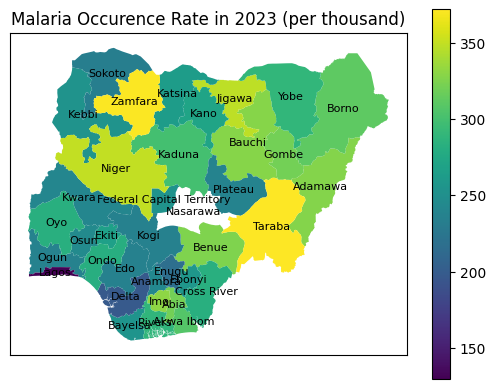

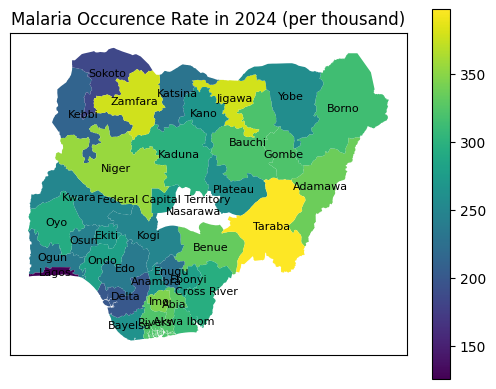

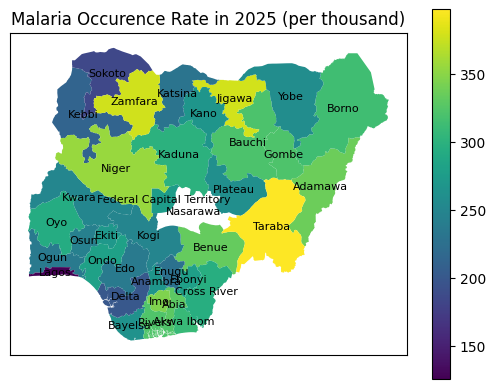

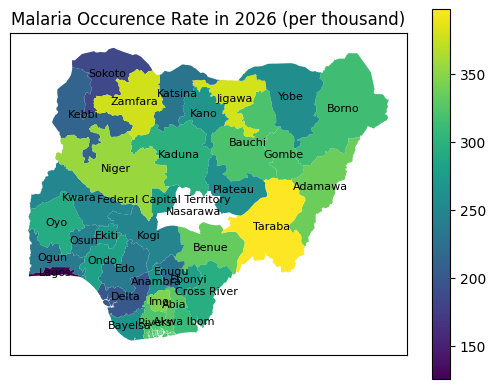

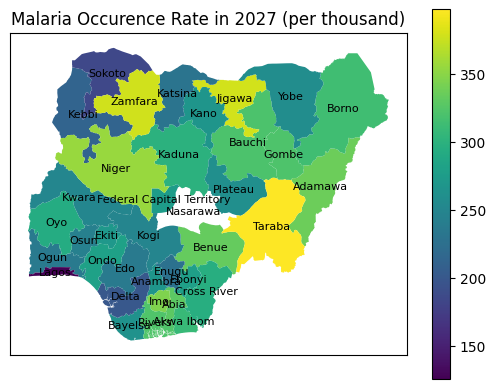

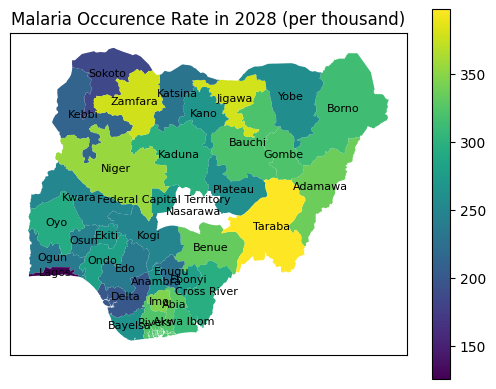

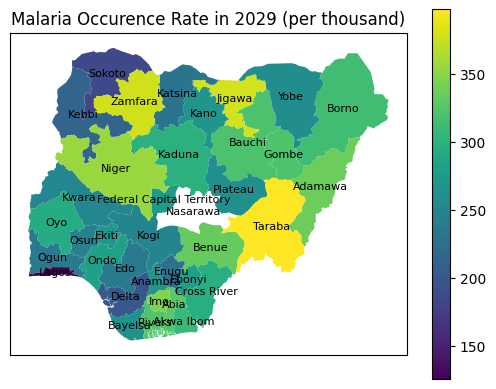

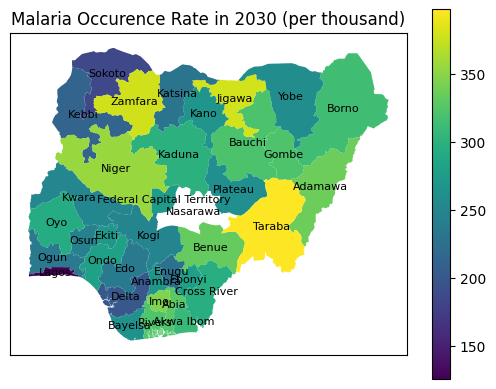

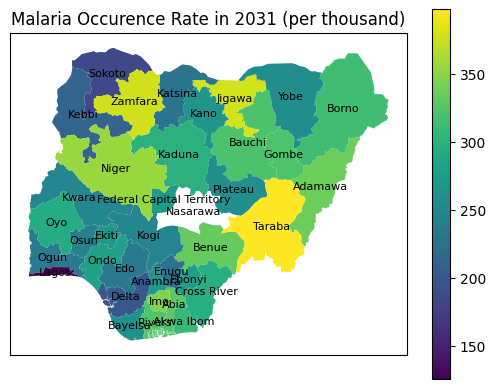

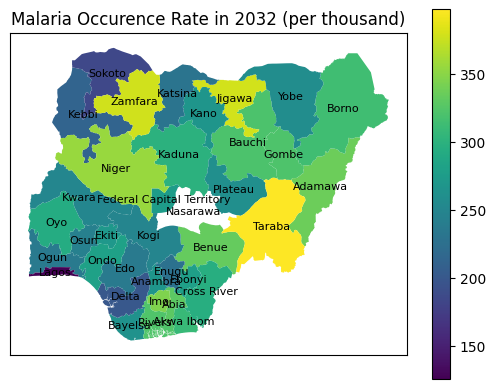

In [84]:
for i in range(2023, 2033):
  result_gdf.plot(column=i, legend=True)

  plt.title(f"Malaria Occurence Rate in {i} (per thousand)")

  for x, y, label in zip(result_gdf.geometry.centroid.x, result_gdf.geometry.centroid.y, result_gdf['State']):
    plt.text(x, y, label, fontsize=8, ha='center', va='center')

  plt.tick_params(
      axis='both',          # changes apply to both axes
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False, # labels along the bottom edge are off
      left=False,        # ticks along the left edge are off
      right=False,       # ticks along the right edge are off
      labelleft=False    # labels along the left edge are off
  )
  plt.savefig(f"after_{i}.png", dpi=300)
  plt.show()

In [64]:
results_df.to_csv('predictions.csv', index=False)

In [65]:
playdf

""


In [66]:
df1 = df.reset_index(drop=True)

In [67]:
df1.head()

,State,Metric,Units,Year,Value
0,Edo,Incidence Rate,Cases per Thousand,2010-01-01,377.970784
1,Lagos,Incidence Rate,Cases per Thousand,2010-01-01,118.814478
2,Ondo,Incidence Rate,Cases per Thousand,2010-01-01,378.645931
3,Zamfara,Incidence Rate,Cases per Thousand,2010-01-01,590.626074
4,Benue,Incidence Rate,Cases per Thousand,2010-01-01,467.030405


In [68]:
pivot_table = pd.pivot_table(df1, values='Value', index='Year', columns='State')
pivot_table


State,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,...,Ogun,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,342.333389,249.748064,282.239256,238.937720,513.277604,251.820417,467.030405,311.818100,368.162110,199.366535,...,292.813873,378.645931,440.539590,397.554997,486.474884,241.583093,480.283892,396.562544,430.362672,590.626074
2011-01-01,293.261851,217.216343,241.390314,207.272208,459.625032,249.850264,425.101850,284.566643,331.817974,183.932930,...,246.593200,359.257783,423.987113,363.390752,474.145838,229.746718,510.878887,360.660313,392.180948,609.023603
2012-01-01,277.460453,218.285805,234.975844,204.657988,384.099566,275.675179,377.184258,252.147502,311.930984,192.775678,...,181.061201,343.377921,386.418161,304.664531,436.064169,253.362041,524.296457,343.743556,343.405383,618.800743
2013-01-01,262.637080,237.067168,236.087122,206.969955,316.781361,297.533079,335.765225,228.477449,297.273352,207.733115,...,137.890794,328.013202,344.119716,255.323457,384.642032,270.748911,515.823607,340.072945,298.193893,609.049406
2014-01-01,229.299123,267.382855,223.116457,189.285255,291.124058,292.771820,307.019696,230.999677,281.672352,211.407308,...,133.888193,316.479100,323.062782,241.851592,343.242719,247.648323,529.059597,351.396028,287.986691,602.659188
2015-01-01,179.475791,307.953810,194.891088,151.921062,289.792888,257.229632,287.395738,252.478979,263.029737,204.765959,...,169.671390,305.468530,319.178759,260.005197,305.602332,183.174368,556.310625,378.448502,297.483026,593.245726
2016-01-01,148.093929,330.313840,176.587078,123.347282,297.799188,219.082738,270.779962,273.964247,246.327954,199.546054,...,224.521492,294.922255,317.330186,284.943292,273.630288,132.399887,536.374924,384.238930,309.116615,531.869263
2017-01-01,162.909241,314.631521,196.267386,128.632698,321.816971,211.782229,259.603933,281.984415,247.009934,214.776970,...,263.537866,300.539764,321.551696,297.942723,258.238464,136.425084,495.896072,355.369288,307.205328,470.990775
2018-01-01,221.179970,258.778848,251.933684,166.349980,361.023974,226.224313,245.588171,270.788096,259.113783,243.709778,...,266.713622,305.803009,317.245896,285.405538,252.197239,193.334080,403.386510,292.802013,297.656069,395.569849


In [69]:
pivot_table['Average'] = pivot_table.mean(axis=1)

In [70]:
pivot_table.head()

State,Abia,Adamawa,Akwa Ibom,Anambra,Bauchi,Bayelsa,Benue,Borno,Cross River,Delta,...,Ondo,Osun,Oyo,Plateau,Rivers,Sokoto,Taraba,Yobe,Zamfara,Average
Year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,342.333389,249.748064,282.239256,238.937720,513.277604,251.820417,467.030405,311.818100,368.162110,199.366535,...,378.645931,440.539590,397.554997,486.474884,241.583093,480.283892,396.562544,430.362672,590.626074,372.063466
2011-01-01,293.261851,217.216343,241.390314,207.272208,459.625032,249.850264,425.101850,284.566643,331.817974,183.932930,...,359.257783,423.987113,363.390752,474.145838,229.746718,510.878887,360.660313,392.180948,609.023603,344.124177
2012-01-01,277.460453,218.285805,234.975844,204.657988,384.099566,275.675179,377.184258,252.147502,311.930984,192.775678,...,343.377921,386.418161,304.664531,436.064169,253.362041,524.296457,343.743556,343.405383,618.800743,321.186792
2013-01-01,262.637080,237.067168,236.087122,206.969955,316.781361,297.533079,335.765225,228.477449,297.273352,207.733115,...,328.013202,344.119716,255.323457,384.642032,270.748911,515.823607,340.072945,298.193893,609.049406,302.452287
2014-01-01,229.299123,267.382855,223.116457,189.285255,291.124058,292.771820,307.019696,230.999677,281.672352,211.407308,...,316.479100,323.062782,241.851592,343.242719,247.648323,529.059597,351.396028,287.986691,602.659188,293.159585


In [71]:
time_df = pivot_table[['Average']]

Text(0, 0.5, 'Value')

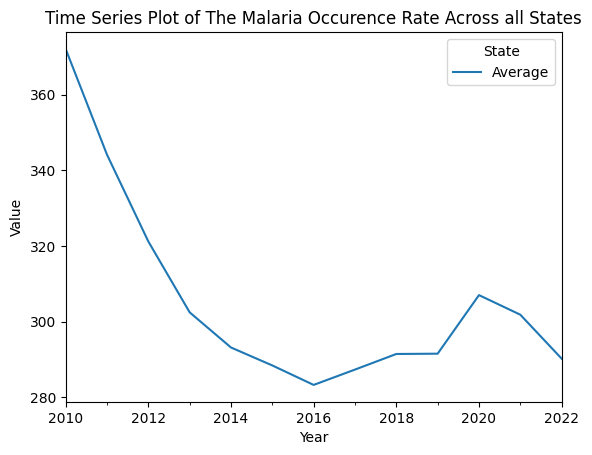

In [72]:
time_df.plot()
plt.title('Time Series Plot of The Malaria Occurence Rate Across all States')
plt.xlabel('Year')
plt.ylabel('Value')

In [73]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   13
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -52.797
Date:                Fri, 28 Feb 2025   AIC                            111.593
Time:                        21:43:00   BIC                            113.048
Sample:                    01-01-2010   HQIC                           111.054
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8082     42.427      0.019      0.985     -82.348      83.964
ma.L2          0.9982    105.003      0.010      0.992    -204.804     206.801
sigma2       276.4861    2.9e+04      0.010      0.9